
## 1. Introduction
The objective of this notebook is to present the feature engineering for the [Telco Customer Churn Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/).

---

## 2. Import Libraries / Settings

In [1]:
# Libraries
import warnings
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label = LabelEncoder()

# Settings
%matplotlib inline
pd.set_option('display.max_columns', None)      
warnings.filterwarnings('ignore')

# Set the path to the dataset 
notebook_path = Path.cwd()
data_path = notebook_path.parent / "notebooks" / "data" / "01_churn_eda_data.csv"

In [2]:
# Import the dataset
data = pd.read_csv(data_path)
data.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,female,no,yes,no,1,no,no phone service,dsl,no,yes,no,no,no,no,monthly,yes,electronic check,29.85,29.85,no
1,male,no,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,1889.50,no
2,male,no,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,monthly,yes,mailed check,53.85,108.15,yes
3,male,no,no,no,45,no,no phone service,dsl,yes,no,yes,yes,no,no,one year,no,bank transfer,42.30,1840.75,no
4,female,no,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,monthly,yes,electronic check,70.70,151.65,yes


# 3. Feature Engineering

In [3]:
data['contract'] = data['contract'].map({'monthly': 1, 'one year': 12, 'two year': 24})
data['churn'] = data['churn'].map({'no': 0, 'yes': 1})

In [4]:
# Lista de colunas para Label Encoding
label_columns = ["gender", "seniorcitizen", "partner", "dependents", "phoneservice", "paperlessbilling", "churn"]

# Aplicar Label Encoding
label_encoder = LabelEncoder() # melhor para variáveis binárias ou ordinais
for col in label_columns:
    if col in data.columns:
        data[col] = label_encoder.fit_transform(data[col])

In [5]:
# Lista de colunas para One-Hot Encoding
one_hot_columns = ["multiplelines", "internetservice", "onlinesecurity", "onlinebackup", 
                   "deviceprotection", "techsupport", "streamingtv", "streamingmovies", "paymentmethod"]

# Aplicar One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_data = one_hot_encoder.fit_transform(data[one_hot_columns])
one_hot_df = pd.DataFrame(one_hot_data, columns=one_hot_encoder.get_feature_names_out(one_hot_columns))

In [6]:
df_final = pd.concat([data.drop(one_hot_columns, axis=1), one_hot_df], axis=1)

In [7]:
df_final

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,contract,paperlessbilling,monthlycharges,totalcharges,churn,multiplelines_no,multiplelines_no phone service,multiplelines_yes,internetservice_dsl,internetservice_fiber optic,internetservice_no,onlinesecurity_no,onlinesecurity_no internet service,onlinesecurity_yes,onlinebackup_no,onlinebackup_no internet service,onlinebackup_yes,deviceprotection_no,deviceprotection_no internet service,deviceprotection_yes,techsupport_no,techsupport_no internet service,techsupport_yes,streamingtv_no,streamingtv_no internet service,streamingtv_yes,streamingmovies_no,streamingmovies_no internet service,streamingmovies_yes,paymentmethod_bank transfer,paymentmethod_credit card,paymentmethod_electronic check,paymentmethod_mailed check
0,0,0,1,0,1,0,1,1,29.85,29.85,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,34,1,12,0,56.95,1889.50,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,2,1,1,1,53.85,108.15,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,45,0,12,0,42.30,1840.75,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,2,1,1,1,70.70,151.65,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,12,1,84.80,1990.50,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7039,0,0,1,1,72,1,12,1,103.20,7362.90,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7040,0,0,1,1,11,0,1,1,29.60,346.45,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1,1,1,0,4,1,1,1,74.40,306.60,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


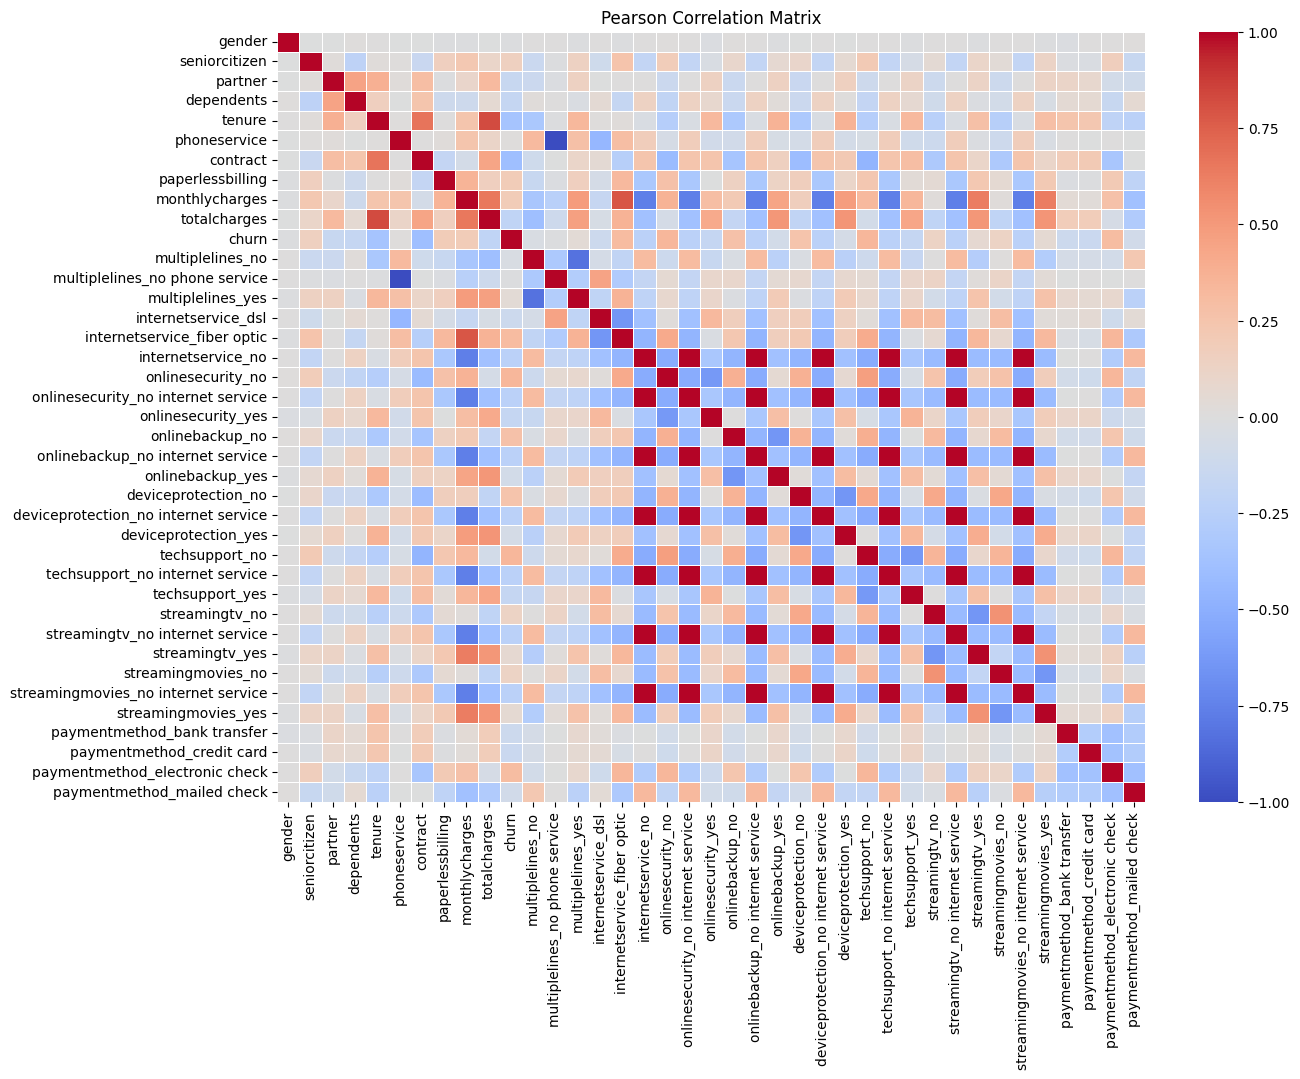

In [8]:
# Calcula a matriz de correlação de Pearson
corr_matrix = df_final.corr(method='pearson')

# Exibe o heatmap da matriz de correlação
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Correlation Matrix')
plt.show()


Tenure vs. Total Charges: Likely shows a strong positive correlation, since longer tenure usually means more accumulated charges.

Monthly Charges vs. Internet Service (Fiber Optic): May show a positive correlation, indicating fiber optic users tend to pay more monthly. (But let´s not forget the churn is high on internet fiber optic service)

Contract Type vs. Churn: Could reveal how contract length impacts churn likelihood.

In [10]:
# save dataset 
output_path = notebook_path.parent / "notebooks" / "data" / "02_churn_features_data.csv"  
df_final.to_csv(output_path, index=False)
